In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       # Standard plotting library
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

X = pd.read_csv('data/application_train_visualization.csv')


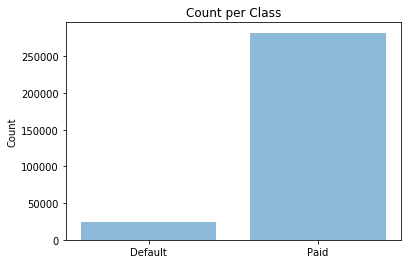

In [25]:
target_count = [np.where(X['TARGET'] == 1)[0].shape[0], np.where(X['TARGET'] == 0)[0].shape[0]]
target_labels = ['Default', 'Paid']
y_pos = np.arange(len(target_labels))
#performance = [10,8,6,4,2,1]
 
    
plt.bar(y_pos, target_count, align='center', alpha=0.5)
plt.xticks(y_pos, target_labels)
plt.ylabel('Count')
plt.title('Count per Class')
 
plt.show()

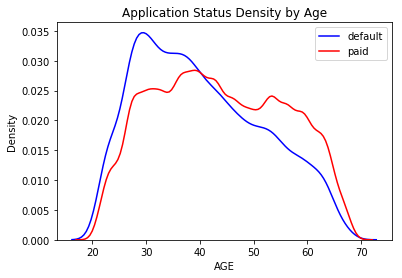

In [45]:
# lets see loan payable by age 
sns.kdeplot(X[X.TARGET == 1]['DAYS_BIRTH'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['DAYS_BIRTH'], color = 'red', label = 'paid')
plt.xlabel('AGE')
plt.ylabel('Density')
plt.title('Application Status Density by Age')
plt.show()

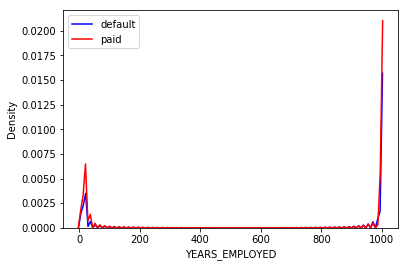

In [43]:
# lets see loan payable by age
sns.kdeplot(X[X.TARGET == 1]['DAYS_EMPLOYED'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['DAYS_EMPLOYED'], color = 'red', label = 'paid')
plt.xlabel('YEARS_EMPLOYED')
plt.ylabel('Density')
plt.show()



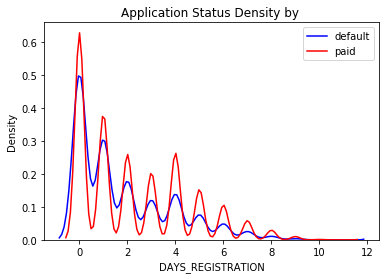

In [56]:
#X['DAYS_REGISTRATION'] = X['DAYS_REGISTRATION'].abs()

sns.kdeplot(X[X.TARGET == 1]['DAYS_LAST_PHONE_CHANGE'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['DAYS_LAST_PHONE_CHANGE'], color = 'red', label = 'paid')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('Density')
plt.title('Application Status Density by ')
plt.show()

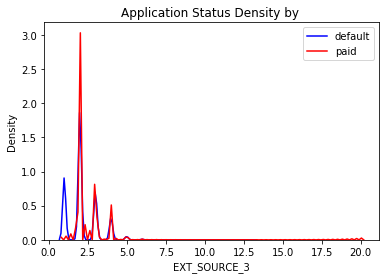

In [53]:
#X['DAYS_REGISTRATION'] = X['DAYS_REGISTRATION'].abs()
#X[E]
sns.kdeplot(X[X.TARGET == 1]['CNT_FAM_MEMBERS'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['CNT_FAM_MEMBERS'], color = 'red', label = 'paid')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('Density')
plt.title('Application Status Density by ')
plt.show()

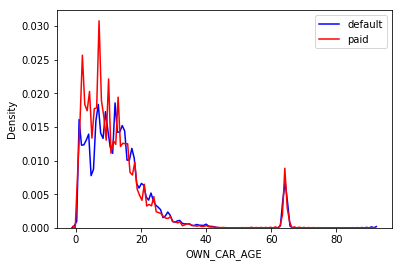

In [90]:
sns.kdeplot(X[X.TARGET == 1]['OWN_CAR_AGE'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['OWN_CAR_AGE'], color = 'red', label = 'paid')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('Density')
plt.show()

Above graph shows that younger applicants are more likely to default than older applicants

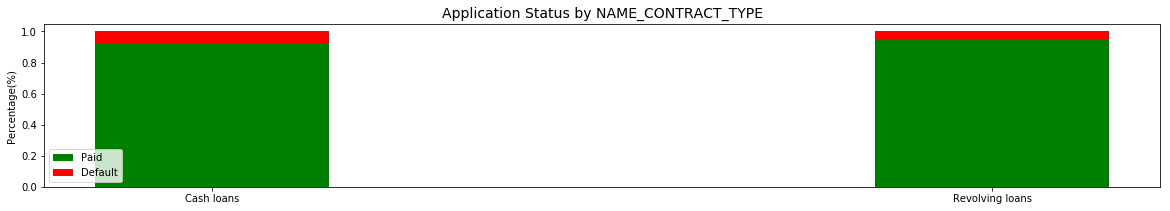

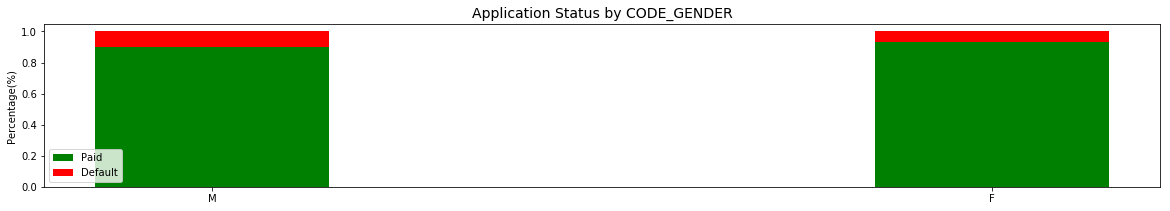

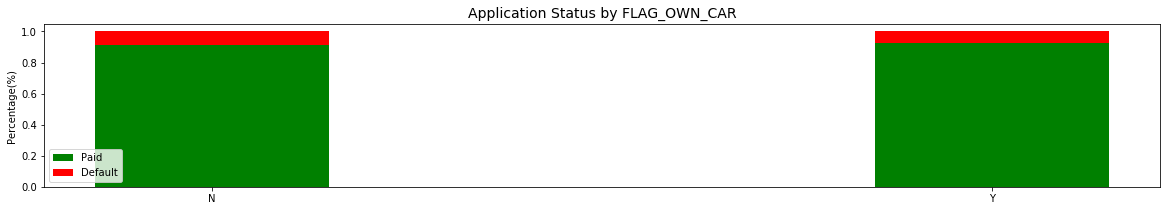

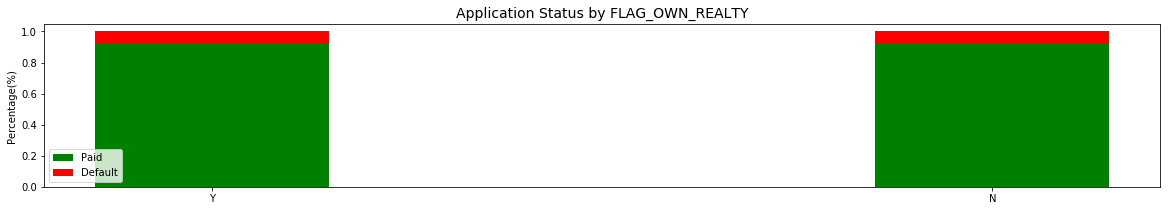

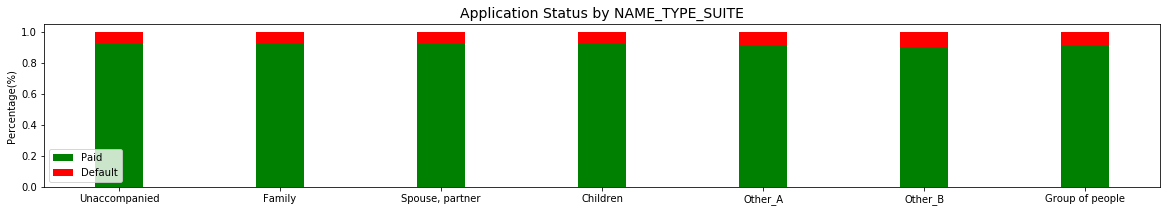

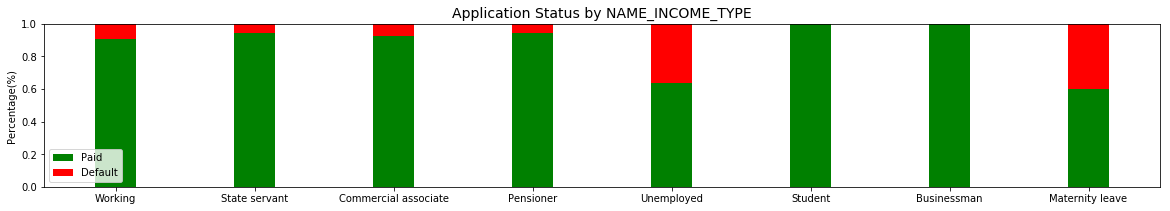

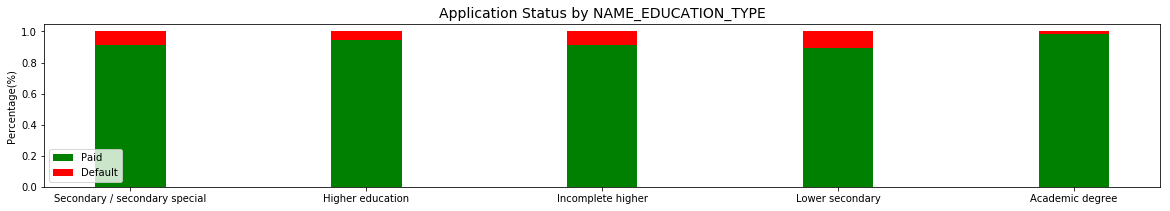

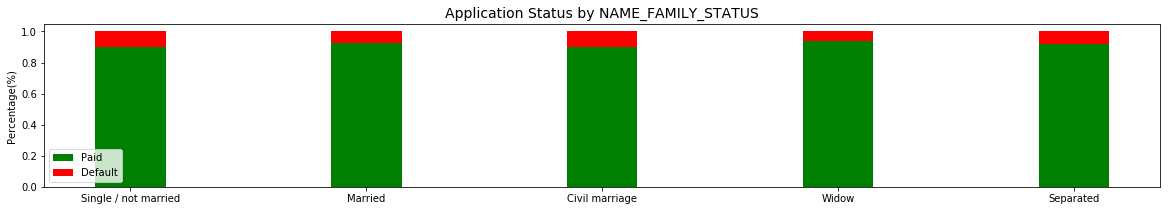

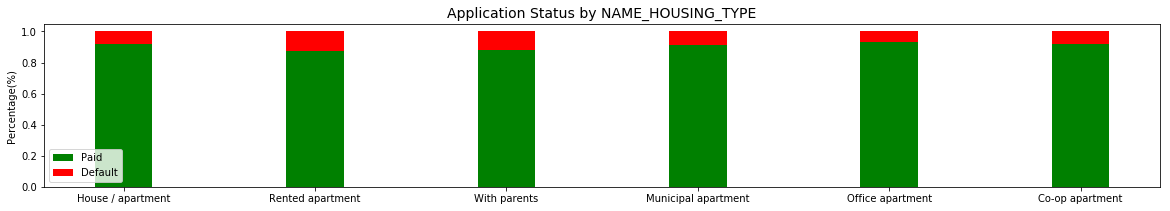

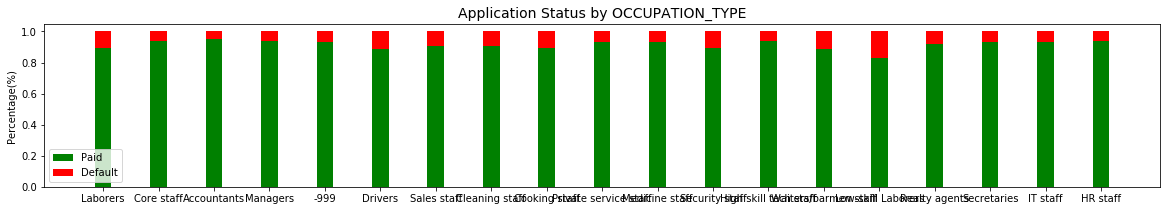

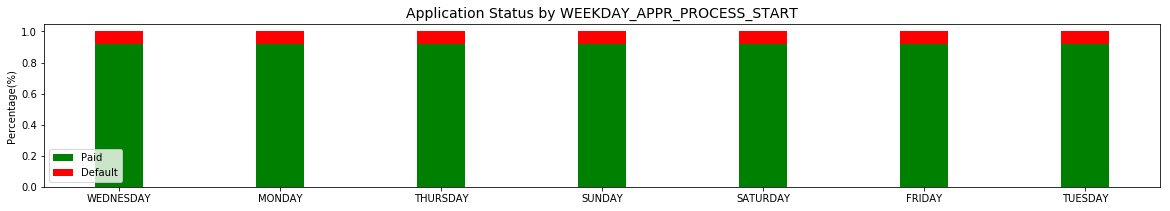

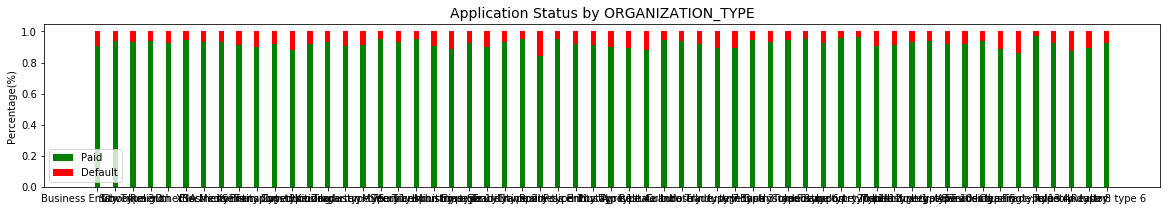

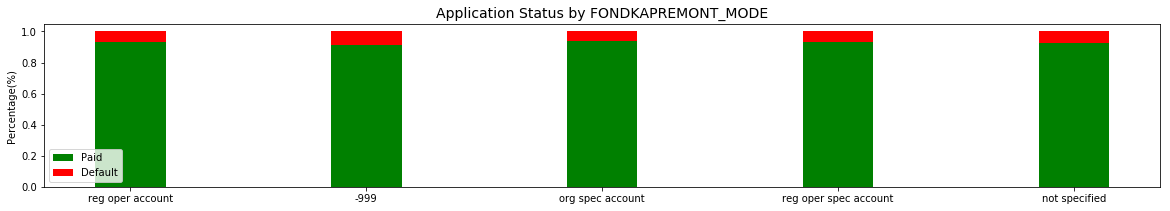

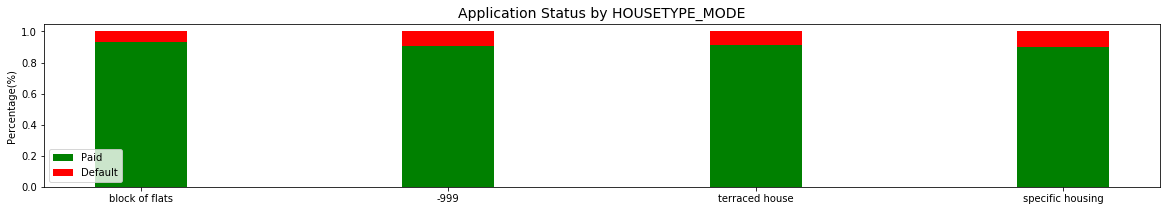

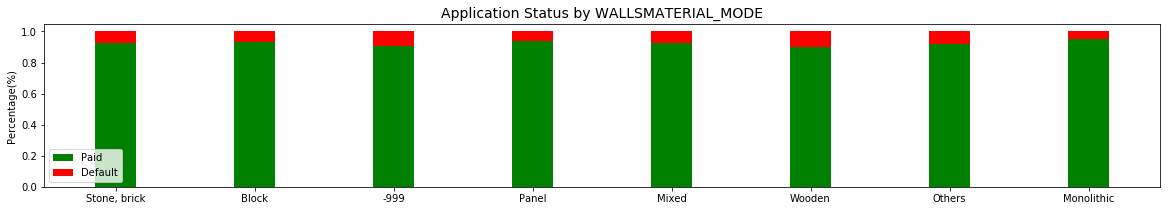

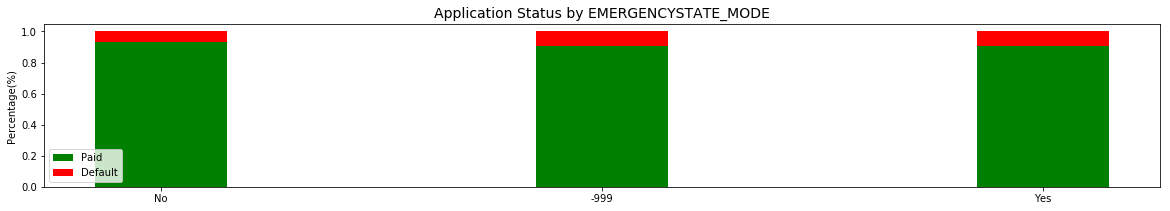

In [38]:
cat_features = [col for col in X.columns if X[col].dtype == 'object']
for cat_i in cat_features:
    cat_ = X[cat_i].unique()
    fig, ax = plt.subplots(figsize=(20,3))
    width = 0.3
    for k, v in enumerate(cat_):
        if pd.isnull(v):
            repay_percentage = X[(X[cat_i].isnull()) & (X['TARGET'] == 0)].shape[0]/ \
                X[(X[cat_i].isnull())].shape[0]
        else:
            repay_percentage = X[(X[cat_i] == v) & (X['TARGET'] == 0)].shape[0]/ \
                X[(X[cat_i] == v)].shape[0]
        plt.bar(k, repay_percentage, width = width, color='g')
        plt.bar(k, 1 - repay_percentage, width = width, bottom=repay_percentage, color='r')
    ax.set_xticks(list(range(k + 1)))
    ax.set_xticklabels(cat_)
    plt.legend(['Paid', 'Default'], loc='lower left')
    plt.title('Application Status by '+cat_i, fontsize=14)
    plt.ylabel('Percentage(%)')
    plt.show()

Observations: 
Name Income Type of Unemployed and maternity leave have high tendency to default